In [18]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

In [19]:
food_consumption = pd.read_csv('food_consumption.csv')
be_consumption = food_consumption[food_consumption['country']=='Belgium']

usa_consumption = food_consumption[food_consumption['country']=='USA']

numeric_cols_be = list(be_consumption.select_dtypes(include=np.number).columns)
numeric_cols_us = list(usa_consumption.select_dtypes(include=np.number).columns)

print(be_consumption[numeric_cols_be].agg('mean'))
print(be_consumption[numeric_cols_be].agg('median'))
print(usa_consumption[numeric_cols_us].agg('mean'))
print(usa_consumption[numeric_cols_us].agg('median'))

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64


In [20]:
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

print(be_and_usa.groupby('country')['consumption'].agg(['mean', 'median']))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


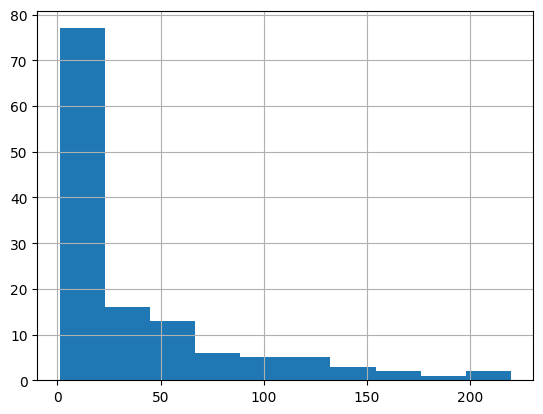

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [21]:
%matplotlib inline

rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']
rice_consumption['co2_emission'].hist()
plt.show()

rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']
print(rice_consumption['co2_emission'].agg(['mean', 'median']))

In [22]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.2,0.4,0.6,0.8,1]))
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))


[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


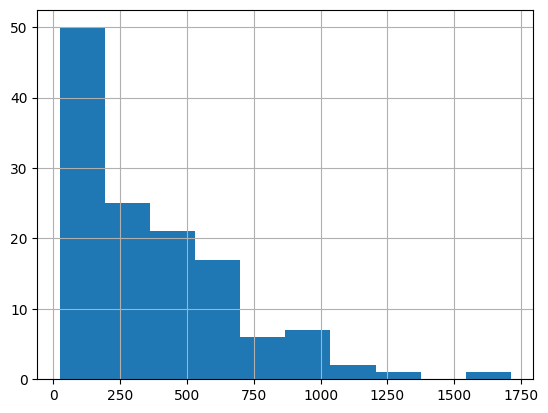

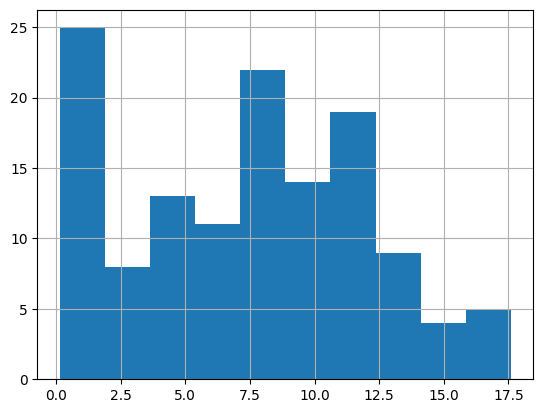

In [23]:
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [24]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]

non_outliers = emissions_by_country[(emissions_by_country >= lower) | (emissions_by_country <= upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [25]:
amir_deals = pd.read_csv('amir_deals.csv')
counts = amir_deals['product'].value_counts()
probs = counts / amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [26]:
np.random.seed(24)
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


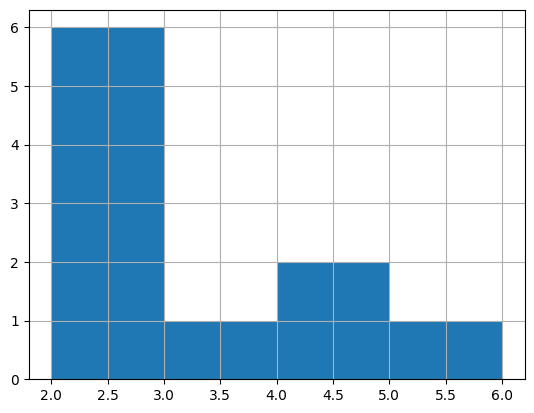

In [27]:
restaurant_groups = pd.read_csv('restaurant_groups.csv')
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

In [28]:
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']
print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [29]:
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print('The expected value is', expected_value)
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print('The probability is ',prob_4_or_more)

The expected value is 2.9000000000000004
The probability is  0.30000000000000004


In [30]:
min_time = 0
max_time = 30

width = max_time - min_time
prob_less_than_5 = uniform.cdf(5, min_time, width)
print(f"P(< 5 min): {prob_less_than_5}")

prob_greater_than_5 = 1 - uniform.cdf(5, min_time, width)
print(f"P(> 5 min): {prob_greater_than_5}")

prob_between_10_and_20 = uniform.cdf(20, min_time, width) - uniform.cdf(10, min_time, width)
print(f"P(10-20 min): {prob_between_10_and_20}")

P(< 5 min): 0.16666666666666666
P(> 5 min): 0.8333333333333334
P(10-20 min): 0.3333333333333333


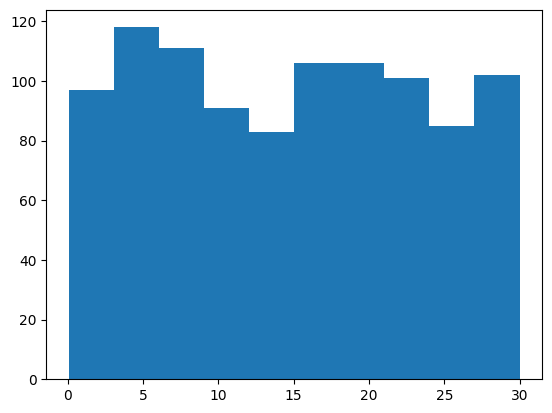

In [32]:
np.random.seed(334)
wait_times = uniform.rvs(0, 30, size=1000)
plt.hist(wait_times)
plt.show()

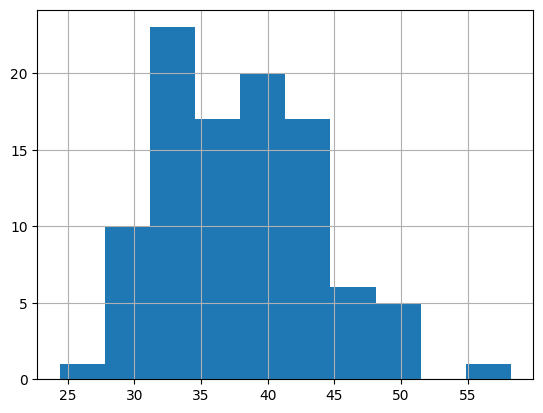

In [33]:
np.random.seed(104)
sample_means = []

for i in range(100):
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  samp_20_mean = np.mean(samp_20)
  sample_means.append(samp_20_mean)

sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.show()

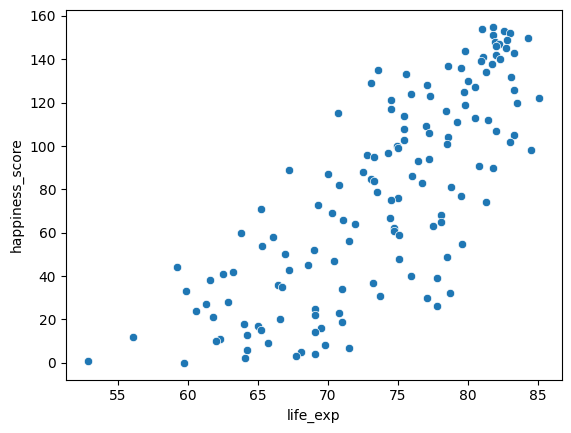

In [36]:
world_happiness = pd.read_csv('world_happiness.csv')
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)
plt.show()

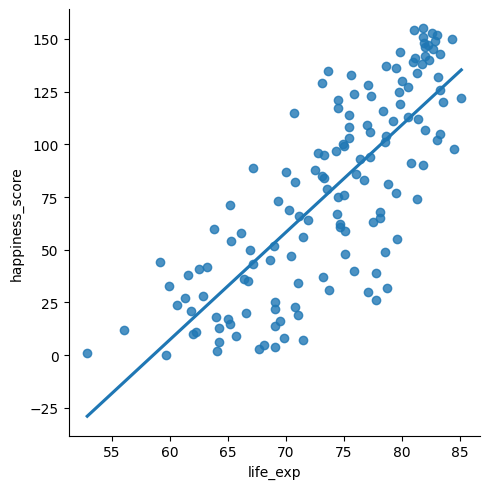

0.7802249053272062


In [37]:
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

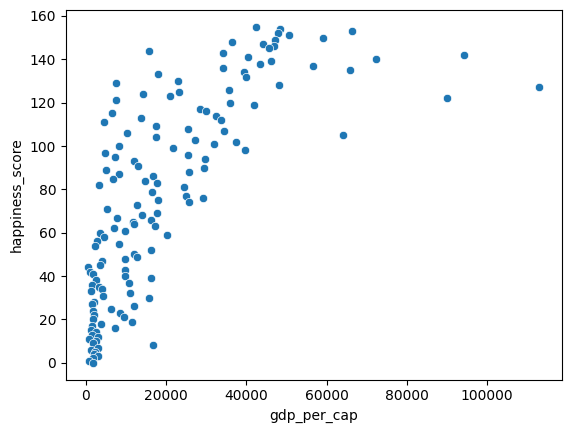

0.7279733012222975


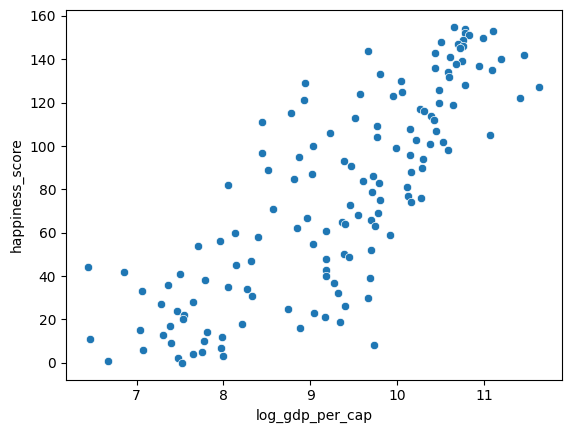

0.7279733012222975


In [39]:
#Before transformation
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

#Let’s transform the data.

world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatter plot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlationcor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score’])
print(cor)
